# House Price Prediction in Nigeria

This notebook covers exploratory data analysis, preprocessing, modeling, and evaluation for predicting house prices in Nigeria.

## 1. Import Required Libraries

We will use pandas, numpy, matplotlib, seaborn, plotly, and scikit-learn for data analysis and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Load the Dataset

Let's load the Nigeria house prices dataset and display the first few rows.

In [3]:
# Load the dataset
df = pd.read_csv("../data/nigeria_houses_data.csv")
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


## 3. Explore Data Structure and Missing Values

Check the dataframe's info, shape, and count missing values for each column.

In [4]:
# DataFrame info and shape
print("Shape:", df.shape)
df.info()

Shape: (24326, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [5]:
# Count missing values for each column
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

## 4. Visualize Target Variable Distribution

Plot the distribution of the 'price' column.

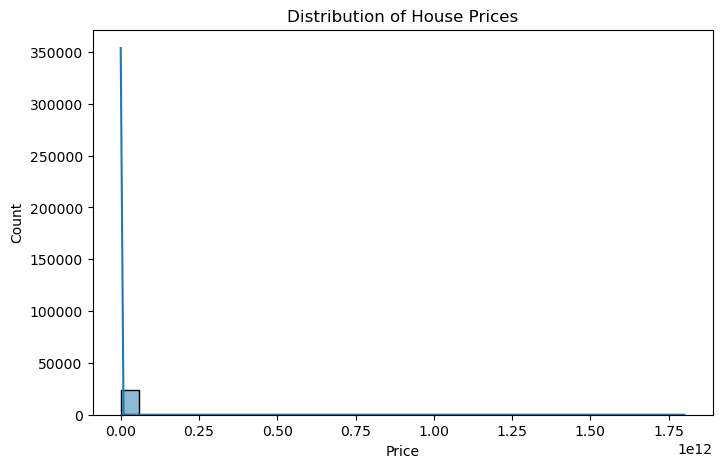

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## 5. Analyze Categorical Features

Display the most common states and visualize their counts.

In [8]:
# Top 10 states by count
state_counts = df['state'].value_counts().head(10)
print(state_counts)

state
Lagos       18445
Abuja        3524
Ogun          637
Oyo           477
Rivers        444
Imo           246
Anambara      145
Enugu         128
Edo           100
Delta          63
Name: count, dtype: int64


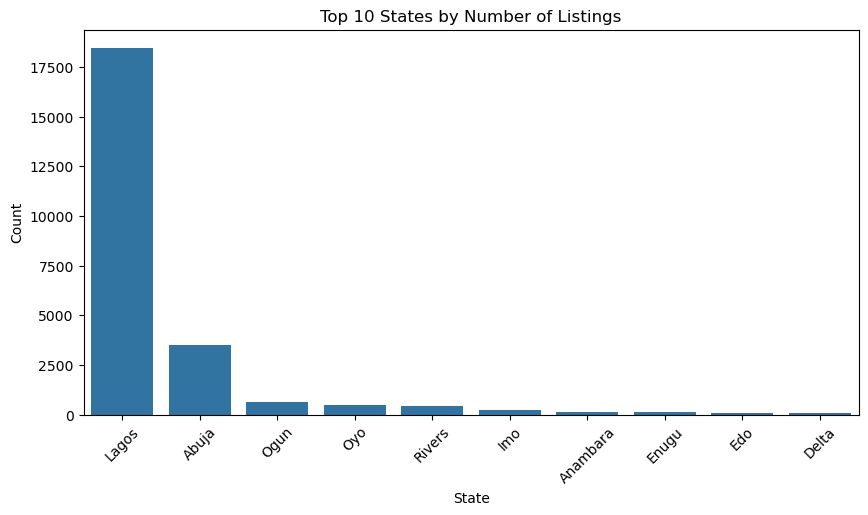

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States by Number of Listings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 6. Explore Feature Relationships

Create scatterplots to explore relationships between features such as 'bedrooms' and 'price'.

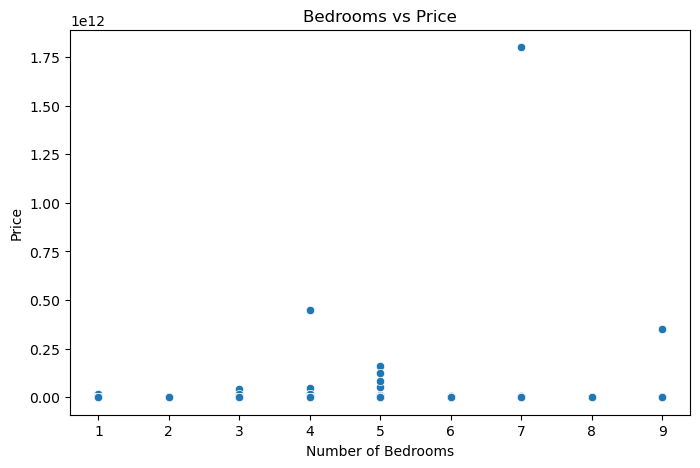

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [12]:
# Interactive plot with Plotly
fig = px.scatter(df, x='bedrooms', y='price', color='state', title='Bedrooms vs Price by State')
fig.show()